# Finding the link of the required product

In [1]:
from bs4 import BeautifulSoup
import requests
from lxml import html

In [162]:
userInput='OnePlus 7T Pro (Haze Blue, 256 GB)'
url_amzn = 'https://www.amazon.in/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=' + userInput
print(url_amzn)

https://www.amazon.in/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=OnePlus 7T Pro (Haze Blue, 256 GB)


In [160]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.129 Safari/537.36'}
source_code = requests.get(url_amzn, headers=headers)


In [161]:
plain_text = source_code.text
soup = BeautifulSoup(plain_text, "html.parser")
links=[]
for titles in soup.find_all('a', {'class': 'a-link-normal a-text-normal'},{'class':'a-size-medium a-color-base a-text-normal'}):
            try:
                links.append(titles)
            except AttributeError:
                continue
                
a=(links[0])
requiredLink='http://www.amazon.in'+a.get('href')
print(requiredLink)


http://www.amazon.in/Test-Exclusive-749/dp/B07DJ8K2KT/ref=sr_1_1?dchild=1&keywords=OnePlus+7T+Pro+%28Haze+Blue%2C+256+GB%29&qid=1588876265&sr=8-1


# Producing .json file associated with scraped data

In [5]:
import urllib.request
import urllib.parse
import urllib.error
import ssl
import json
import re  

In [29]:
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

html = urllib.request.urlopen(requiredLink, context=ctx).read()
html= requests.get(url_amzn, headers=headers)
soup = BeautifulSoup(html.text)
html = soup.prettify('utf-8')
product_json = {}

# This block of code will help extract the <Brand> of the item

for divs in soup.findAll('div', attrs={'class': 'a-box-group'}):
    try:
        product_json['brand'] = divs['data-brand']
        break
    except:
        pass

# This block of code will help extract the <Product Title> of the item

for spans in soup.findAll('span', attrs={'id': 'productTitle'}):
    name_of_product = spans.text.strip()
    product_json['name'] = name_of_product
    break

# This block of code will help extract the <price> of the item 

for divs in soup.findAll('div'):
    try:
        price = str(divs['data-asin-price'])
        product_json['price'] = 'Rs.' + price
        break
    except:
        pass

# This block of code will help extract the <average star rating> of the product

for i_tags in soup.findAll('i',
                           attrs={'data-hook': 'average-star-rating'}):
    for spans in i_tags.findAll('span', attrs={'class': 'a-icon-alt'}):
        product_json['star-rating'] = spans.text.strip()
        break

# This block of code will help extract the <number of customer reviews> of the product

for spans in soup.findAll('span', attrs={'id': 'acrCustomerReviewText'
                          }):
    if spans.text:
        review_count = spans.text.strip()
        product_json['customer-reviews-count'] = review_count
        break

# This block of code will help extract the <details> of the product

product_json['details'] = []
for ul_tags in soup.findAll('ul',
                            attrs={'class': 'a-unordered-list a-vertical a-spacing-none'
                            }):
    for li_tags in ul_tags.findAll('li'):
        for spans in li_tags.findAll('span',
                attrs={'class': 'a-list-item'}, text=True,
                recursive=False):
            product_json['details'].append(spans.text.strip())

#Extract <date of reviews>
product_json['reviewed-date'] = []
for divs in soup.findAll('span',
                           attrs={'class': 'a-size-base a-color-secondary review-date'
                           }):
    reviewed_date = divs.text.strip()
    product_json['reviewed-date'].append(reviewed_date)

# This block of code will help extract the <long reviews> of the product

product_json['long-reviews'] = []
for divs in soup.findAll('div', attrs={'data-hook': 'review-collapsed'
                         }):
    long_review = divs.text.strip()
    product_json['long-reviews'].append(long_review)

# Saving the scraped html file

with open('output_file.html', 'wb') as file:
    file.write(html)

# Saving the scraped data in json format

with open('product.json', 'w') as outfile:
    json.dump(product_json, outfile, indent=4)
print ('----------Extraction of data is complete. Check json file.----------')

----------Extraction of data is complete. Check json file.----------


# Putting all the reviews from .json into a list (reviews_list)

In [41]:
import pycountry

count1=len(product_json['reviewed-date'])
places=['']*count1 
country1=[]
date=[]*count1
day=[]*count1
month=[]*count1
year=[]*count1

# reviewed-data from product.json file is stored in places (list)
# Countries from reviews are given in country1 (list)
count1=len(product_json['reviewed-date'])
for i in range(0,count1):
        places[i]=(str(product_json['reviewed-date'][i])) 
        text=places[i]
        for country in pycountry.countries:
            if country.name in text:
                country1.append(country.name)
                
# date extracted from places and is stored in date (list)                
for i in range(len(places)):
    places[i]=places[i].replace(country1[i],'')
    a=((places[i].replace(places[i][:16],'')))
    date.append(a)

     
for i in range(len(date)):
    if 'on' in date[i]:
        date[i]=((date[i].replace('on ','')))

# day, month, year extracted from places and is stored in date (list)     
for i in range(count1): 
    temp=date[i].split()
    day.append(int(temp[0]))
    month.append(temp[1])
    year.append(temp[2])

                
print('*****************************************************************************************************')
print(country1)
print('*****************************************************************************************************')
print(date)
print('*****************************************************************************************************')
print(day)
print('*****************************************************************************************************')
print(month)
print('*****************************************************************************************************')
print(year)
print('*****************************************************************************************************')


# long-reviews from product.json file is stored in reviews_list (list)     
reviews_list=[]
count=len(product_json['long-reviews'])
reviews_list=[' ']*count
for i in range(0,count):
    reviews_list[i]=(product_json['long-reviews'][i])
for i in reviews_list:
    print(i)
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')


*****************************************************************************************************
['India', 'India', 'India', 'India', 'India', 'United States', 'United States']
*****************************************************************************************************
['15 October 2019', '16 October 2019', '15 October 2019', '22 October 2019', '17 October 2019', ' 4 January 2020', ' 6 March 2020']
*****************************************************************************************************
[15, 16, 15, 22, 17, 4, 6]
*****************************************************************************************************
['October', 'October', 'October', 'October', 'October', 'January', 'March']
*****************************************************************************************************
['2019', '2019', '2019', '2019', '2019', '2020', '2020']
*****************************************************************************************************
I think I am the

# Performing sentiment analysis 

In [129]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings("ignore")

In [144]:
# Sentiment Analysis without using the built-in tool

'''
1.Remove numbers, characters and white spaces from reviews
2.If review has 'not' replace 'not' and the next word together with an Antonym
3.Find the sentiScore for each word after tokenization
4.Using above find the sentiScore of the sentence

'''
class AntonymReplacer(object):
    def replace(self, word):
        ant = list()
        for syn in wn.synsets(word):
            for lemma in syn.lemmas():
                if lemma.antonyms():
                    ant.append(lemma.antonyms()[0].name())
        if len(ant) >= 1:
            return ant[0]
        else:
            return None

    def negreplace(self, string):
        i = 0
        sent = word_tokenize(string)
        len_sent = len(sent)
        words = []
        while i < len_sent:
            word = sent[i]
            if word == 'not' and i + 1 < len_sent:
                ant = self.replace(sent[i + 1])
                if ant:
                    words.append(ant)
                    i += 2
                    continue
            words.append(word)
            i += 1
        return words

lemmatizer = WordNetLemmatizer()


def penn_to_wn(tag):
    
    #Convert between the PennTreebank tags to simple Wordnet tags
    
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None


def swn_polarity(text):
    
    #Return a sentiment polarity: 0 = negative, 1 = positive
    

    sentiment = 0.0
    tokens_count = 0
    b = ""
    if "not" in text:
        x = ""
        raw_sentences = sent_tokenize(text)
        for raw_sentence in raw_sentences:
            tagged_sentence = pos_tag(word_tokenize(raw_sentence))

            for word, tag in tagged_sentence:
                wn_tag = penn_to_wn(tag)
                if wn_tag in (wn.NOUN, wn.ADJ):
                    x = x + " " + word
                elif word == 'not':
                    x = x + " " + word
                else:
                    continue
        rep = AntonymReplacer()
        a = rep.negreplace(x)
        for i in range(len(a)):
            b = b + " " + str(a[i])
    if b == "":
        b = text
    
    raw_sentences = sent_tokenize(b)
    for raw_sentence in raw_sentences:
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))

        for word, tag in tagged_sentence: 
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
                continue

            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                continue

            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                continue

            # Take the first sense, the most common
            
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())

            sentiment += swn_synset.pos_score() - swn_synset.neg_score()
            tokens_count += 1
    return sentiment


for j in range(0,len(reviews_list)):
    paragraph =reviews_list[j] 

    paragraph = re.sub(r'\[[0-9]*\]', ' ', paragraph)  #removing references to a particular line denoted as for e.g[3]
    paragraph = re.sub(r'\s+', ' ', paragraph)  #removing duplicate white spaces
    paragraph

    formatted_paragraph = re.sub('[^a-zA-Z]', ' ', paragraph )  #removing all characters except a-z and A-Z
    formatted_paragraph = re.sub(r'\s+', ' ', formatted_paragraph)  #removing duplicate white spaces
    formatted_paragraph
    num = swn_polarity(paragraph)

    print(num)
    print("---------------")


1.625
---------------
8.625
---------------
-0.875
---------------
3.5
---------------
1.25
---------------
1.5
---------------
2.75
---------------


In [187]:


# VADER sentiment analysis tool for getting Compound score.
def sentimental(sentence):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(sentence)
    score=vs['compound']
    return score


# VADER sentiment analysis tool for getting pos, neg and neu.
def sentimental_Score(sentence):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(sentence)
    score=vs['compound']
    if score >= 0.5:
        return 'pos'
    elif (score > -0.5) and (score < 0.5):
        return 'neu'
    elif score <= -0.5:
        return 'neg'


    
#reviews_list.apply(lambda x: sentimental_Score(x))
res=list(map(sentimental_Score,reviews_list))
print(res)


['pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos']


In [168]:
pos=[] # pos is list of postive reviews
neg=[] # neg is list of negative reviews

#Seperating negatives and positives into different dataframes for creating a 'Wordcloud'.
for i in range(0,len(res)):
    if res[i]=='pos':
        pos.append(reviews_list[i])
    elif res[i]=='neg':
        neg.append(reviews_list[i])

print(pos)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print(neg)
    

["I think I am the first one to write a review for this beauty :)  I ordered this at 11 PM in the night and It was there in my hand in the morning 9 AM.I have used iPhone X, Samsung s9 plus and Samsung s10 plus before coming to One Plus 7T.  My experience so far with this:1. Display: It's amazing. Sharpness, brightness and 90Hz displays makes it one of the most beautiful displays.2. Camera: All of my previous mobiles had great cameras. 7t Pro is nothing less than that. If you are a professional photographer, you might find differences. For a normal user, it's just perfect.3. Battery: I am getting a very good battery backup. When I go to bed, it's 30%. 30T Warp charger is a booom.4. Performance: Blazing and Lightning fast.5. One of the USP of OnePlus mobiles is its Oxygen OS. After using iPhone and Samsungs One UI, I can tell you that it's the best. Lots of gestures, shortcuts and very lightweight.The only Con I think it has is its weight. It's on the heavier side but after using it for

In [169]:
#Stemming of different form of words which will be used by 'create_Word_Corpus()' function

def stemming(tokens):
    ps=PorterStemmer()
    stem_words=[]
    for x in tokens:
        stem_words.append(ps.stem(x))
    return stem_words
'''
To Generate a word corpus following steps are performed inside the function 'create_Word_Corpus(df)'

Step 1 :- Iterating over the 'summary' section of reviews such that we only get important content of a review.
Step 2 :- Converting the content into Lowercase.
Step 3 :- Using nltk.tokenize to get words from the content.
Step 4 :- Using string.punctuation to get rid of punctuations.
Step 5 :- Using stopwords from nltk.corpus to get rid of stopwords.
Step 6 :- Stemming of Words.
Step 7 :- Finally forming a word corpus and returning the word corpus.
'''

def create_Word_Corpus(df):
    words_corpus = ''
    for val in df:
        text = val.lower()
        tokens = nltk.word_tokenize(text)
        tokens = [word for word in tokens if word not in string.punctuation]
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        tokens = stemming(tokens)
        for words in tokens:
            words_corpus = words_corpus + words + ' '
    return words_corpus

In [224]:
def plot_Cloud(wordCloud):
    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

In [225]:
pos_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(pos))
neg_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(neg))

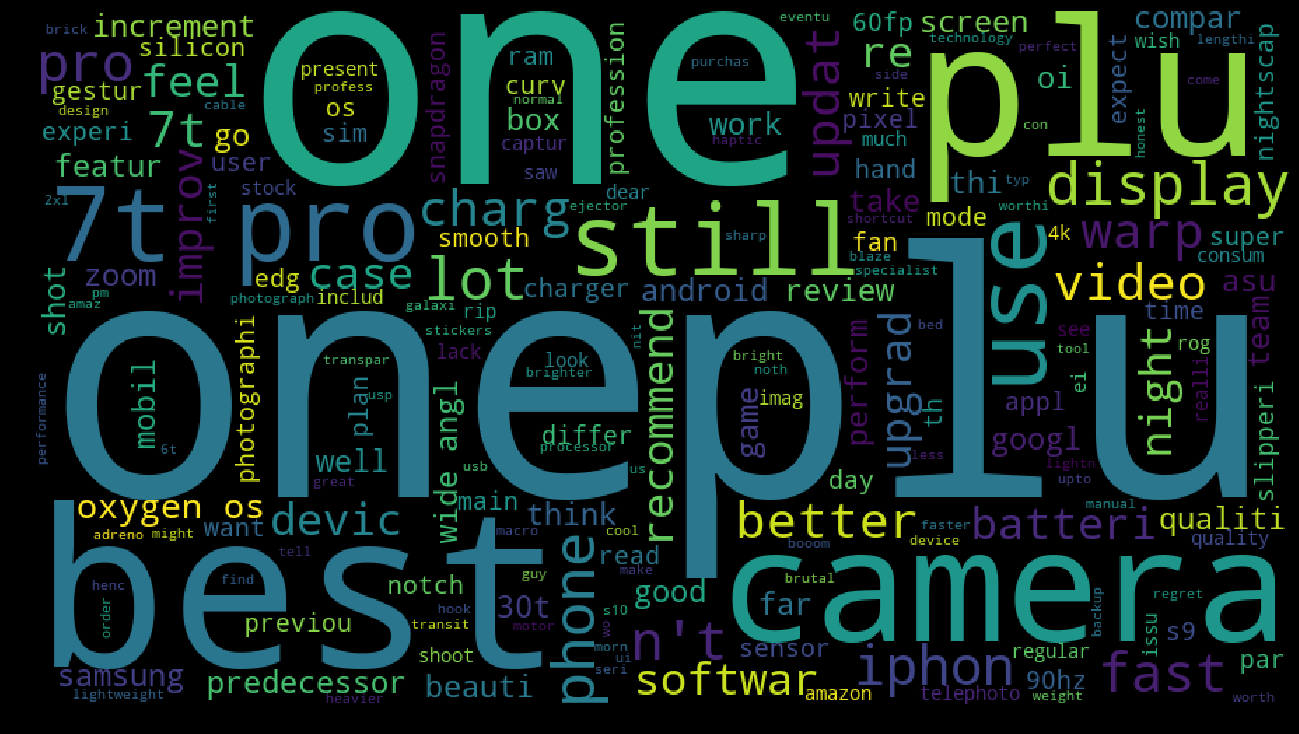

In [226]:
plot_Cloud(pos_wordcloud)

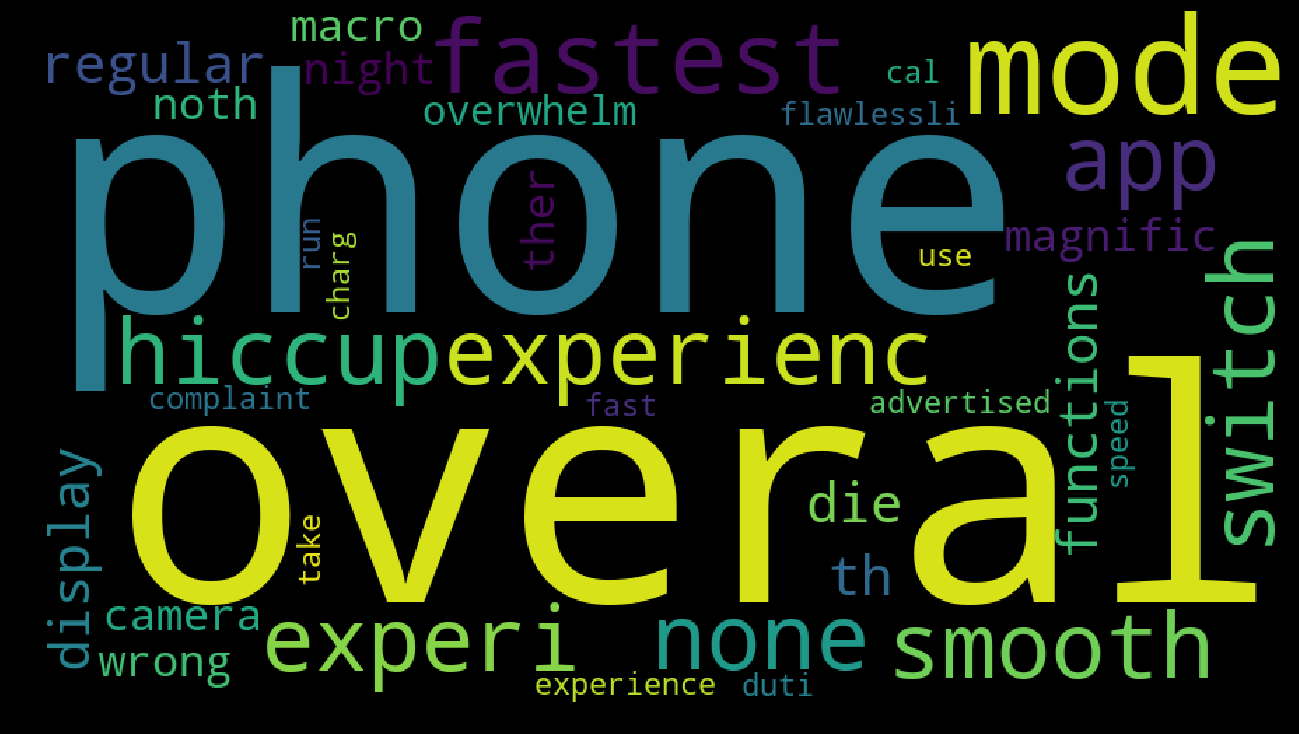

<Figure size 432x288 with 0 Axes>

In [173]:
plot_Cloud(neg_wordcloud)

In [227]:
# Segregating positive and negative reviews through month/year

posMonth=[]
negMonth=[]
posYear=[]
negYear=[]

for i in range(len(res)):
    if res[i]=='pos':
        posMonth.append(month[i])
        posYear.append(year[i])
        
    else:
        negMonth.append(month[i])
        negYear.append(year[i])
        
print('Positive reviews --> ',posMonth)
print('Negative reviews --> ',negMonth)
print('Positive reviews --> ',posYear)
print('Negative reviews --> ',negYear)


Positive reviews -->  ['October', 'October', 'October', 'October', 'January', 'March']
Negative reviews -->  ['October']
Positive reviews -->  ['2019', '2019', '2019', '2019', '2020', '2020']
Negative reviews -->  ['2019']


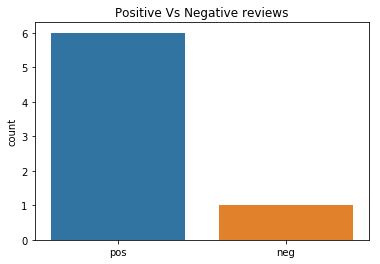

In [197]:
# Graph positive Vs negative reviews

import seaborn as sns

# Create count plot with region on the y-axis
sns.countplot(x=res).set_title('Positive Vs Negative reviews')

# Show plot
plt.show()

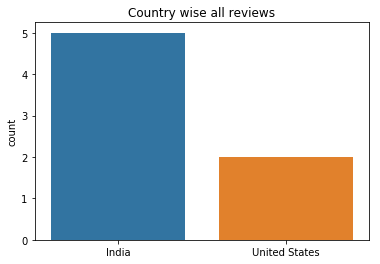

In [229]:
# Graph of country wise all reviews

import seaborn as sns

# Create count plot with region on the y-axis
sns.countplot(x=country1).set_title('Country wise all reviews')

# Show plot
plt.show()

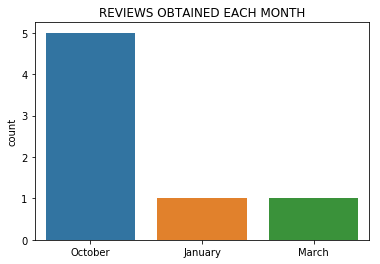

In [192]:
# Graph of all reviews given across the months

sns.countplot(x=month).set_title('REVIEWS OBTAINED EACH MONTH')
# Show plot
plt.show()

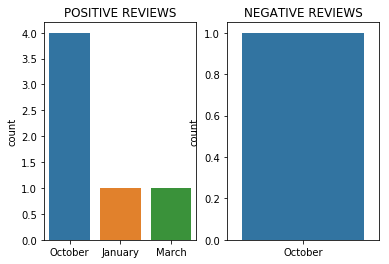

In [203]:
# Graph of positive and negative reviews respectively for months

# using the variable axs for multiple Axes
fig, ax =plt.subplots(1,2)
sns.countplot(x=posMonth, ax=ax[0]).set_title('POSITIVE REVIEWS')
sns.countplot(x=negMonth, ax=ax[1]).set_title('NEGATIVE REVIEWS')
fig.show()

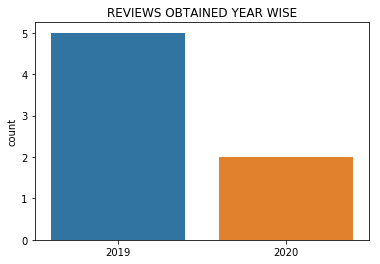

In [193]:
# Graph of all reviews given across the year

sns.countplot(x=year).set_title('REVIEWS OBTAINED YEAR WISE')
# Show plot
plt.show()

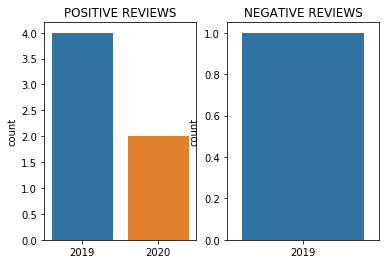

In [194]:
# Graph of positive and negative reviews respectively for years

fig, ax =plt.subplots(1,2)
sns.countplot(x=posYear, ax=ax[0]).set_title('POSITIVE REVIEWS')
sns.countplot(x=negYear, ax=ax[1]).set_title('NEGATIVE REVIEWS')
fig.show()

# Product Summary

Product Name:  OnePlus 7T Pro (Haze Blue, 8GB RAM, Fluid AMOLED Display, 256GB Storage, 4085mAH Battery)
Price:  Rs.47999.00
Star Rating:  4.5 out of 5 stars
Number of Reviews:  3,015 ratings
Product Details:
--> 48+8+16MP triple rear camera with telephoto lens + ultrawide angle lens | 16MP front camera with 4K video capture @ 30/60 FPS, ultrashot, nightscape, portrait, pro mode, panorama, HDR, AI scene detection, RAW image
--> 16.94 centimeters (6.67 inch) 90Hz fluid display with 3120 x 1440 pixels resolution and 516 ppi pixel density
--> Memory, Storage & SIM: 8GB RAM | 256GB internal memory | Dual SIM (nano+nano) dual-standby (4G+4G)
--> Oxygen OS based on Android v10 operating system with 2.96GHz Qualcomm Snapdragon 855 Plus AI Engine octa-core, 7nm processor, Adreno 640
--> 4085mAH lithium-ion battery
--> 1 year manufacturer warranty for device and 6 months manufacturer warranty for in-box accessories including batteries from the date of purchase
--> Box also includes: Warp charge

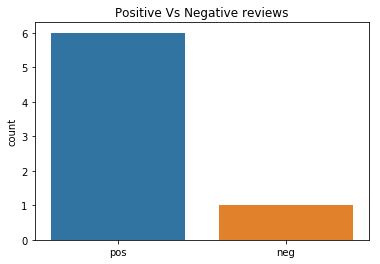

In [196]:
print('Product Name: ',product_json['name'])
print('=============')

print('Price: ',product_json['price'])
print('======')

print('Star Rating: ',product_json['star-rating'])
print('===========')

print('Number of Reviews: ',product_json['customer-reviews-count'])
print('==================')

print('Product Details:')
print('================')
for i in product_json['details']:
    print('-->',i)

print('==============================================')
print('Number of Positive Vs Negative review comments:')
print('==============================================')


sns.countplot(x=res).set_title('Positive Vs Negative reviews')

# Show plot
plt.show()